In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.ensemble import GradientBoostingRegressor



In [26]:
# chargement des données depuis la destination dans le PC
donnees = pd.read_excel("energy_efficiency.xlsx")
donnees;

In [27]:
X = donnees.iloc[:, :8]
y = donnees.iloc[:,8:]

In [28]:
# Partition des données en données de test et données d'entraînement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [29]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
# Normalisation des données d'entraînement
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train_scaled)

# Normalisation des données de test
X_test_normalized = normalizer.transform(X_test_scaled)


#### Cas de la première sortie/cible

In [31]:
# Cas de la première cible
y_train_1d = y_train.iloc[:, 0]  # pour la première cible des données d'entrainnement
y_test_1d = y_test.iloc[:, 0]    # pour la première cible des données de test

In [32]:
# Choix et entraînement du modèle
model1 = GradientBoostingRegressor(n_estimators=20000, random_state=50)
model1.fit(X_train_normalized, y_train_1d)


GradientBoostingRegressor(n_estimators=20000, random_state=50)

In [33]:
# Prédiction des targets avec le modèle choisi
y_pred = model1.predict(X_test_normalized)
y_pred.shape

(154,)

In [34]:
# Erreur quadratique moyenne
mse = mean_squared_error(y_test_1d, y_pred)
print(f'Erreur quadratique moyenne: {mse}')

# Coefficient de détermination
r2 = r2_score(y_test_1d, y_pred)
print(f'Coefficient de détermination: {r2}')

Erreur quadratique moyenne: 0.10884208458340759
Coefficient de détermination: 0.9989162729362436


#### Cas de la deuxième sortie/cible

In [35]:
# Cas de la cible 2
y_train_1d2 = y_train.iloc[:, 1]  # pour la deuxième cible des données d'entrainnement
y_test_1d2 = y_test.iloc[:, 1]    # pour la deuxième cible des données de test

In [36]:
# Choix et entraînement du modèle
model2 = GradientBoostingRegressor(n_estimators = 20000, random_state=50)
model2.fit(X_train_normalized, y_train_1d2)

GradientBoostingRegressor(n_estimators=20000, random_state=50)

In [37]:
# Prédiction des targets avec le modèle choisi
y_pred2 = model2.predict(X_test_normalized)
y_pred2.shape

(154,)

In [38]:
# Erreur quadratique moyenne
mse2 = mean_squared_error(y_test_1d2, y_pred2)
print(f'Erreur quadratique moyenne: {mse2}')

# Coefficient de détermination
r2_2 = r2_score(y_test_1d2, y_pred2)
print(f'Coefficient de détermination: {r2_2}')

Erreur quadratique moyenne: 0.34570982728186284
Coefficient de détermination: 0.9960683213843121


Dimensions des données d'entraînement: (614, 8)
Dimensions des données de test: (154, 8)


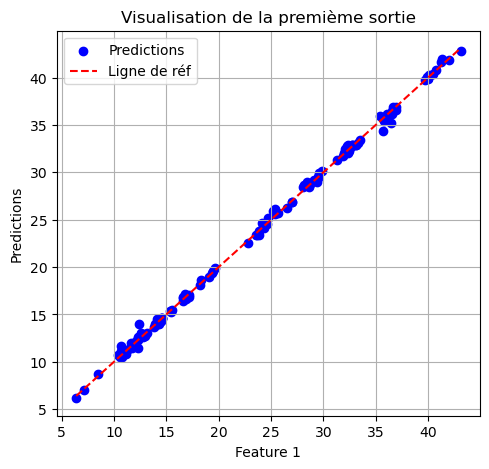

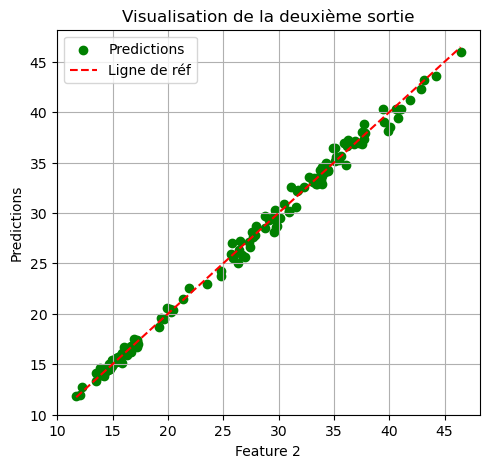

In [39]:
# Visualisation de l'écart entre les prédictions et les valeurs réelles
import matplotlib.pyplot as plt

# Vérification des dimensions
print(f'Dimensions des données d\'entraînement: {X_train.shape}')
print(f'Dimensions des données de test: {X_test.shape}')

# Conversion de DataFrames Pandas vers Numpy
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

#y_pred_np = y_pred.to_numpy() 
#y_test_1d_np = y_test_1d.to_numpy()
y_pred_np = y_pred
y_test_1d_np = y_test_1d

# Visualisation de la première sortie
# Supposons que y_test_1d_np et y_pred_np soient des objets numpy.ndarray
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_1d_np, y_pred_np, c='b', marker='o', label='Predictions')
plt.plot([y_test_1d_np.min(), y_test_1d_np.max()], [y_test_1d_np.min(), y_test_1d_np.max()], 'r--', label='Ligne de réf')
plt.xlabel('Feature 1')
plt.ylabel('Predictions')
plt.title('Visualisation de la premième sortie')
plt.legend()
plt.grid()
plt.show()

# Visualisation de la deuxième sortie
y_pred2_np = y_pred2
y_test_1d2_np = y_test_1d2

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.scatter(y_test_1d2_np, y_pred2_np, c='g', marker='o', label='Predictions')
plt.plot([y_test_1d2_np.min(), y_test_1d2_np.max()], [y_test_1d2_np.min(), y_test_1d2_np.max()], 'r--', label='Ligne de réf')
plt.xlabel('Feature 2')
plt.ylabel('Predictions')
plt.title('Visualisation de la deuxième sortie')
plt.legend()
plt.grid()
plt.show()

plt.tight_layout()
plt.savefig('GBM_plot.png')
plt.close()

# Visualisation de l'image enregistrée
from PIL import Image

# Ouverture du fichier image
img = Image.open('GBM_plot.png')

# Affichage de l'image
img.show()


#### Enregistrement du modèle pour la première sortie

In [40]:
# Enregistrement du modèle avec pickle

import pickle # on importe la librerie pickle pour l'enregistrement du modèle

saved_model_1=pickle.dumps(model1) # "model1" est le nom du model GBM pour la première sortie

model_de_pick=pickle.loads(saved_model_1)

In [41]:
# Enregistrement du modèle (comme fichier partageable) avec joblib

import joblib

from joblib import Parallel, delayed

joblib.dump(model1,"FinProjAIBac3_GBM_1.pkl")

['FinProjAIBac3_GBM_1.pkl']

## Enregistrement du modèle pour la deuxième sortie

In [42]:
saved_model_2=pickle.dumps(model2) # "model2" est le nom du model GBM pour la deuxièmesortie

model_de_pick=pickle.loads(saved_model_2)

In [43]:
joblib.dump(model2,"FinProjAIBac3_GBM_2.pkl")

['FinProjAIBac3_GBM_2.pkl']